# Questions

**Question 1:  What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**
  - Anomaly Detection refers to the process of identifying data points that deviate significantly from the expected behavior in a dataset.
  - These datapoints are often referred to as outliers and can raise errors that need to be eleminated.
  - There are mainly three types anomalies:-
    - Point Anomalies :- Point anomaly occurs when a single data point is significantly different from the rest of the dataset.
    - example - A sudden large transaction in an account when its normal transaction is small.
    - Contextual Anomaly :- These anomalies are context based i.e. can be a anomaly in one context but normal in other.
    - example - A sudden increace of user on a site at a time when normally there are not much users.
    - Collective Anomaly :- Collective anomaly refers to a set of data points that are anomalous together but individually they may not be anomalous.
    - example - A sudden change in readings of all the sensors of a system leads to collective anomaly.

**Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.**
  - Isolation Forest:-
    - It is a tree-based ensemble anomaly detection method.
    - It randomly divide the data.
    - It directly isolates anomalies rather than modeling normal data.
    - It can be used for high-dimensional data like Fraud detection and Large scale industrial data.
  - DBSCAN:-
    - It is a density-based clustering algorithm.
    - It points in high density regions form clusters, while points in low-density regions are labeled as noise.
    - It can be used for detecting anomalies in low dimensional data with clear density differences.
  - Local Outlier Factor:-
    - It is a density-based local anomaly detection algorithm.
    - It compares the local density of a point to the densities of its neighbors.
    - If a point has a much lower density than its neighbors then it is an outlier.
    - It can be used for data with local density variation like behavioral anomaly detection.

**Question 3: What are the key components of a Time Series? Explain each with one example.**
  - Key components of a Time Series:-
    - **Trend** - Trend shows the long term upward or downward movement in a time series.
    - example - The increase of number of internet users worldwide every year showing an upward trend.
    - **Seasonality** - It represents repeating patterns or behaviors at regular time intervals.
    - example - Ice cream sales are higher in summer and lower in winter.
    - **Irregular Component** - It consists of unpredictable, short-term fluctuations caused by unexpected events showing no patterns.
    - example - A sudden drop in airline ticket sales due to plane crash.
    - **Cyclical Component** - It refers to fluctuations in a time series that occur over longer, irregular intervals, usually influenced by economic cycles.
    - example - Housing market prices rise and fall over multi-year cycles depending on the economy.

**Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?**
  - A time series is said to be stationary if its statistical properties do not change over time.
  - A stationary series has constant mean and constant variance over time.
  - Test for stationary series:-
    - Visual Inspection - Plot a time series graph and look for trends and seasonality if there is any it is not stationary series.
    - Summary Statics - divide the series into small parts and calculate its mean and variance if there in no large difference then it is statinoary series.
  - Transform non-statinoary series:-
    - Differencing - Substract previous value by current.
    - Detrending - Eleminate trends using regression and moving average.

**Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.**
  - AR Model:-
    - It uses past values of a time series to predict future values.
    - AR(p) means the model uses the previous p observations.
    - It is used when data shows correlation with its own past values.
  - MA Model:-
    - It uses past forecast errors to make predictions.
    - MA(q) means the model uses the previous q error terms.
    - It is used when data random shocks or noise affect short-term behavior.
  - ARIMA Model:-
    - It is a combination of AR + differencing + MA.
    - ARIMA(p, d, q) where p = past values, d = differencing to remove trend q = past errors.
    - It is used when data is non seasonal time series with trends.
  - SARIMA Model:-
    - It extends ARIMA by adding seasonal components.
    - SARIMA(p, d, q)(P, D, Q)_s where first part handles non-seasonal trends and second part handles seasonal patterns.
    - It is used when data is time series with clear seasonality.
  - SARIMAX Model:-
    - It is a combination of SARIMA + extra external factors.
    - It icludes predictors like holidays, marketing spend, weather, etc.
    - It is used when seasonal data influenced by outside factors.

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
Index(['Month', '#Passengers'], dtype='object')


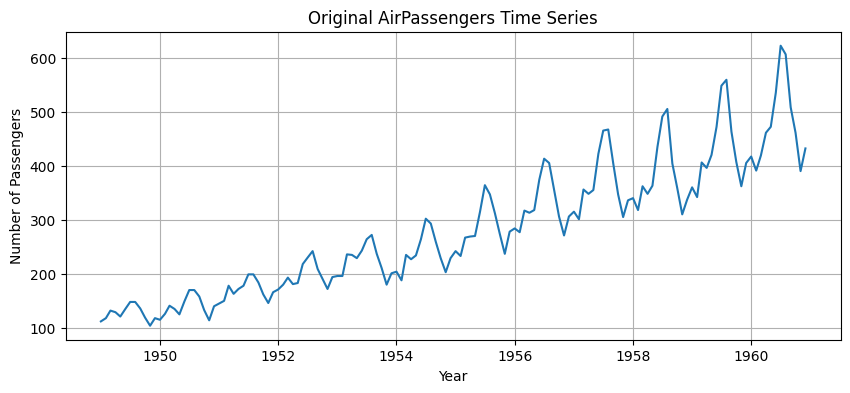

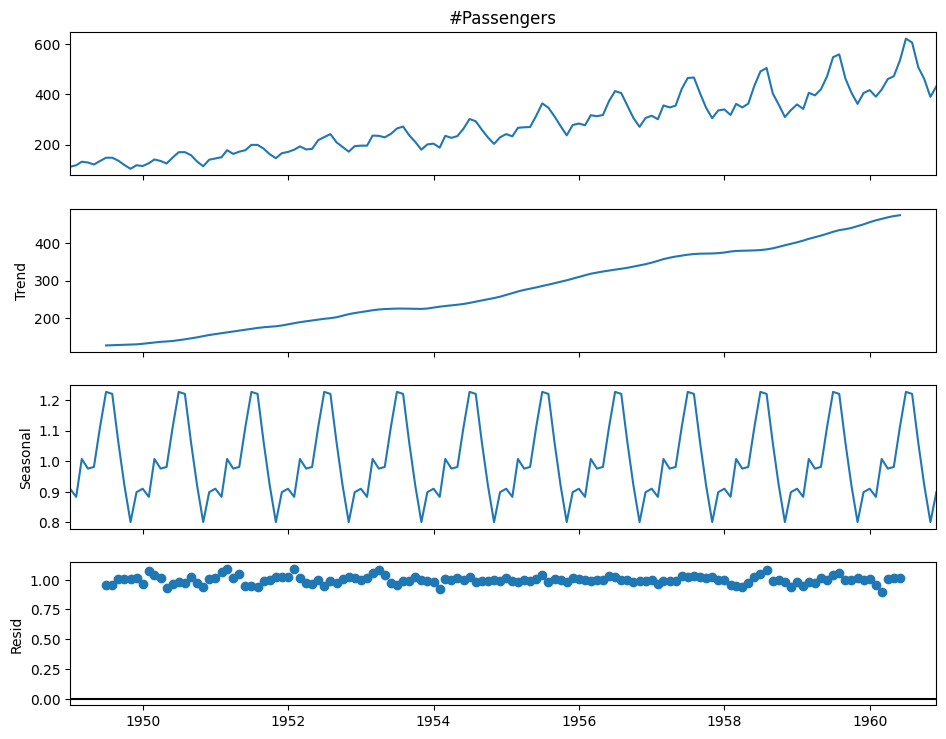

In [1]:
# Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

file_path = "AirPassengers.csv"
data = pd.read_csv(file_path)

print(data.head())
print(data.columns)

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

plt.figure(figsize=(10,4))
plt.plot(data['#Passengers'], label='Passengers')
plt.title("Original AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.show()

decomposition = seasonal_decompose(data['#Passengers'], model='multiplicative')

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()






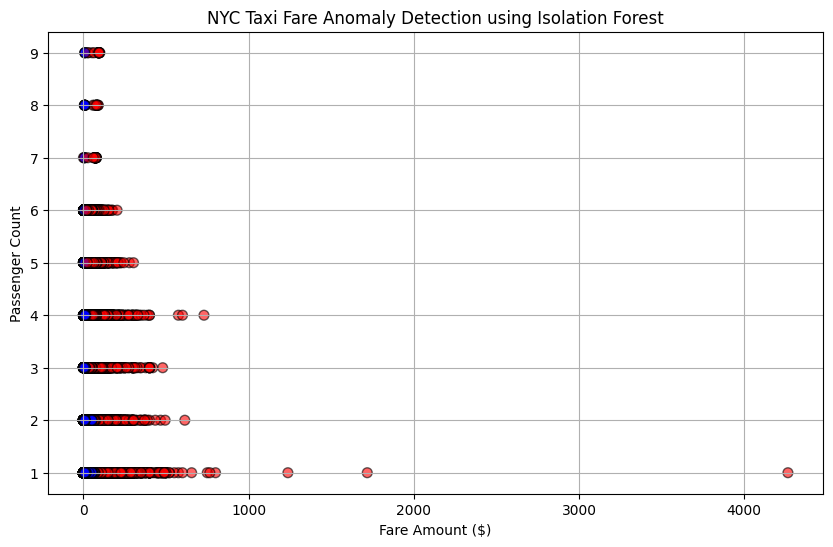

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

file_path = "NYC_taxi_fare_data.csv"
data = pd.read_csv(file_path, low_memory=False)

df = data[['fare_amount', 'passenger_count']].copy()
df = df[(df['fare_amount'] > 0) & (df['passenger_count'] > 0)].reset_index(drop=True)

iso_forest = IsolationForest(contamination=0.02, random_state=1)
df['anomaly'] = iso_forest.fit_predict(df)

df['anomaly_flag'] = df['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

plt.figure(figsize=(10,6))
colors = {'Normal':'blue', 'Anomaly':'red'}
plt.scatter(df['fare_amount'], df['passenger_count'],
            c=df['anomaly_flag'].map(colors), alpha=0.6, edgecolor='k', s=50)
plt.xlabel('Fare Amount ($)')
plt.ylabel('Passenger Count')
plt.title('NYC Taxi Fare Anomaly Detection using Isolation Forest')
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


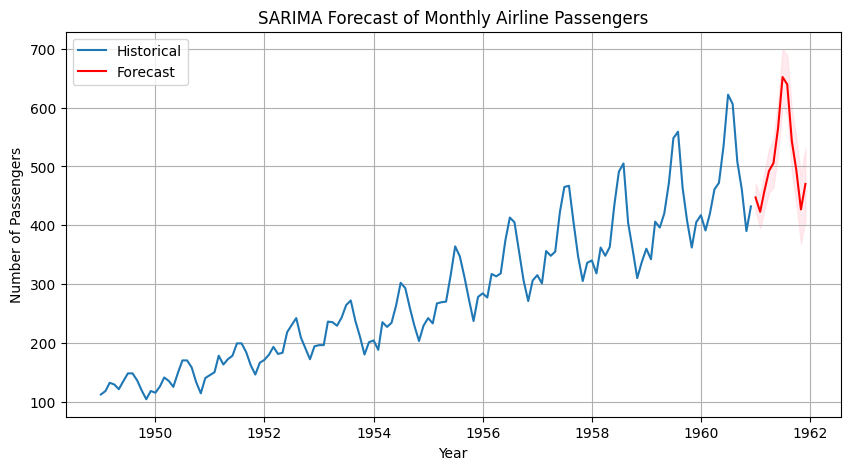

In [6]:
# Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

from statsmodels.tsa.statespace.sarimax import SARIMAX

file_path = "AirPassengers.csv"
data = pd.read_csv(file_path)

data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

ts = data['#Passengers']

model = SARIMAX(ts,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10,5))
plt.plot(ts, label='Historical')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title('SARIMA Forecast of Monthly Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


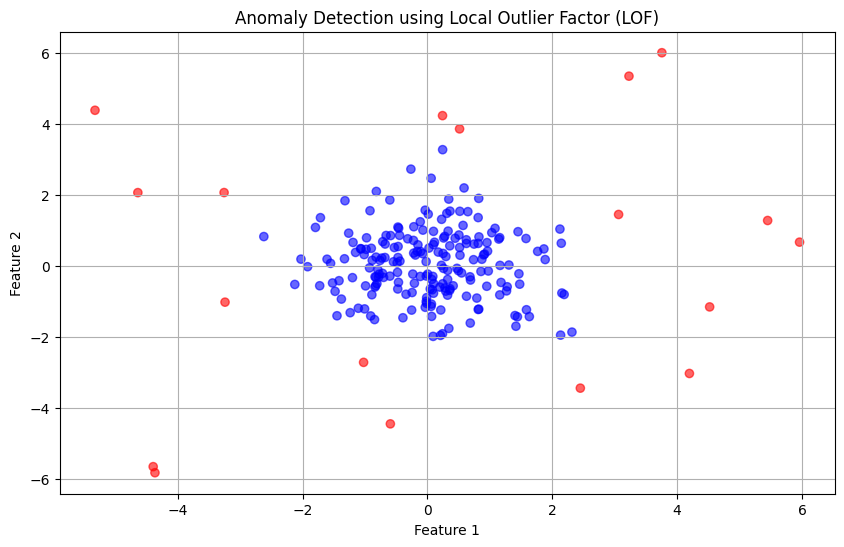

In [7]:
# Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_normal = np.random.randn(200, 2)
X_anomalies = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X_normal, X_anomalies])

df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.08)
df['LOF_Pred'] = lof.fit_predict(df)

df['Anomaly'] = df['LOF_Pred'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

plt.figure(figsize=(10,6))
colors = {'Normal':'blue', 'Anomaly':'red'}
plt.scatter(df['Feature1'], df['Feature2'], c=df['Anomaly'].map(colors), alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.grid(True)
plt.show()


**Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.**

**Explain your real-time data science workflow:**

**● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?**

**● Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?**

**● How would you validate and monitor the performance over time?**

**● How would this solution help business decisions or operations?**
  - Anomaly Detection in Streaming Data:-
    - Stream data in mini-batches.
    - Preprocess features: scale numeric values, encode categorical features.
    - Apply anomaly detection model to identify spikes or drops.
    - Flag anomalies for alerting or further investigation.
  - Time Series Model for Short-Term Forecasting:-
    - Aggregate or resample data if needed.
    - Train SARIMAX on historical data with exogenous variables.
    - Forecast next 1 to 4 hours or 24 hours depending on operational needs.
  - Model Validation and Monitoring:-
    - For forecasting we use MAE,RMSE.
    - For anomaly detection we use Precision, Recall and F1-score.
    - Compare predicted vs actual energy consumption in real-time dashboards.
    - Track model drift: if errors increase consistently, retrain the model.
    - Continuously log flagged anomalies to refine thresholds or update models.
  - Business and Operational Benefits:-
    - **Prevent Power Outages:-** Detect unusual spikes/drops that may indicate grid failures or faults.
    - **Optimize Energy Distribution:-** Forecast demand to allocate resources efficiently and avoid overloading.
    - **Cost Savings:-** Reduce operational costs by scheduling energy generation based on accurate forecasts.
    - **Decision Support:-** Alerts and forecasts help operators make proactive decisions.
    - **Customer Satisfaction:-** Prevent service interruptions and improve reliability.